In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [3]:
import pandas as pd

portfolio_data = pd.read_csv(path_data+'portfolio_data.csv', index_col='Unnamed: 0')
portfolio_data.head()

,mean_return,variance,pf_weights,bm_weights,Security,GICS Sector,GICS Sub Industry
Unnamed: 0,,,,,,,
A,0.146146,0.035194,0.000,0.0,Agilent Technologies Inc,Health Care,Health Care Equipment
AAL,0.444411,0.094328,0.214,0.0,American Airlines Group,Industrials,Airlines
AAP,0.242189,0.029633,0.000,0.0,Advance Auto Parts,Consumer Discretionary,Automotive Retail
AAPL,0.225074,0.027283,0.000,0.0,Apple Inc.,Information Technology,Computer Hardware
ABBV,0.182541,0.029926,0.000,0.0,AbbVie,Health Care,Pharmaceuticals


In [4]:
# exercise 01

"""
Active return

In this first exercise, you're going to calculate the active return of a portfolio that's managed against a benchmark. You've learned many ways of how to calculate total return over a period. For this exercise, you'll use the simple mean returns multiplied with the weights to obtain a total return for both the portfolio as well as the benchmark. Available is portfolio data containing weights and asset returns under portfolio_data. Have a look at the data by running portfolio_data.head(10) in the IPython Shell. Good luck!
"""

# Instructions

"""

    Inspect the portfolio weights by checking whether they sum up to 100%, by using the .sum() function on the pf_weights column.
---

    Calculate the portfolio return by multiplying the portfolio weights column with the mean returns of the assets, and summing that to get the total return.
---

    Repeat the steps and calculate the total return of the benchmark.
---

    Calculate the active return by subtracting the benchmark performance from the portfolio performance. Print the results.

"""

# solution

# Check the portfolio weights
print(portfolio_data.pf_weights.sum())

#----------------------------------#

# Calculate return of the portfolio
total_return_pf = (portfolio_data['pf_weights']*portfolio_data['mean_return']).sum()

# Calculate return of the benchmark
total_return_bm = (portfolio_data['bm_weights']*portfolio_data['mean_return']).sum()

# Calculate and print the active return
active_return = total_return_pf - total_return_bm
print ("%.2f%%" % active_return)

#----------------------------------#

# Conclusion

"""
Great work! You now have calculated the most relevant performance number for a benchmarked portfolio. Next time someone tells you about their great performance, make sure to ask about their performance relative to the benchmark, as that's where a talented portfolio manager can differentiate him/herself.
"""

100.0
22.58%


"\nGreat work! You now have calculated the most relevant performance number for a benchmarked portfolio. Next time someone tells you about their great performance, make sure to ask about their performance relative to the benchmark, as that's where a talented portfolio manager can differentiate him/herself.\n"

In [5]:
# exercise 02

"""
Industry attribution

In this exercise, you're going to calculate the relative industry position of your portfolio, versus a benchmark. As a portfolio manager you need to understand your portfolio's underweight and overweight positions (or "industry bets"), as they are a large driver of performance, as well as a potential source of risk.

The DataFrame portfolio_data is available, containing details about the industry classification, obtained from the Global Industry Classification System or "GICS", of your portfolio holdings, as well as your portfolio weights and the benchmark weights.
"""

# Instructions

"""

    Inspect the weights of your portfolio pf_weights, and of the benchmark under bm_weights. To make sure that the weights are correct, double check that the weights sum up to 100%.
---

    Collapse the DataFrame on the GICS Sector using the groupby command, to be able to see performance and weights on a sector level. Make sure to sum the groupby, to get the summed values for each column.
---

    Now calculate the active weights of the portfolio by comparing the portfolio weights in the column pf_weights, with the benchmark weights in the column bm_weights. Inspect the active weights.
---
Question

Which of these statements about the portfolio's positions are correct?
Possible answers:
    
    The portfolio is overweight Consumer Discretionary which lead to a positive performance versus benchmark.
    
    The portfolio is neither underweight, or overweight on Energy.
    
    The portfolio is underweight on 5 sectors, as well as overweight on 5 sectors, and these weights balance each other out.
    
    All of the above. {Answer}
"""

# solution

# Print the sum of the bm and pf weights
print (portfolio_data.bm_weights.sum())
print (portfolio_data.pf_weights.sum())

# Group dataframe by GICS sectors 
grouped_df=portfolio_data.groupby('GICS Sector').sum()

# Calculate active weights of portfolio
grouped_df['active_weight']=grouped_df['pf_weights']-grouped_df['bm_weights']
print (grouped_df['active_weight'])

#----------------------------------#

# Conclusion

"""
Correct! You can quickly see from the negative and positive values of the active weights whether the portfolio was over- or underweight a certain sector.
"""

100.001
100.0
GICS Sector
Consumer Discretionary         20.257
Consumer Staples               -5.176
Energy                          0.000
Financials                     -2.116
Health Care                     2.865
Industrials                     2.465
Information Technology          8.693
Materials                      -2.043
Real Estate                     2.014
Telecommunications Services    -1.367
Utilities                     -25.593
Name: active_weight, dtype: float64


'\nCorrect! You can quickly see from the negative and positive values of the active weights whether the portfolio was over- or underweight a certain sector.\n'

# Size factor

Stocks with a lower market value (mid and small caps) typically realize higher returns than those with a higher market value or capitalization (large caps). The size factor measures this difference in return between small cap companies relative to large cap companies. Suppose you would take the correlation of the S&P500 returns and the size factor returns. What would you expect to find?

### Possible Answers


    I would expect a positive correlation between the size factor and the S&P500 returns.
    
    
    I would expect a negative correlation between the size factor and the S&P500 returns.{Answer}
    
    
    I would expect to find no correlation between the size factor and the S&P500 returns.

**The S&P500 consist mostly of large cap companies. Since the size factor returns are positive when small cap companies do well relative to large cap, the two should be negatively related to each other.**

In [8]:
df = pd.read_csv(path_data+'df_ex03.csv', parse_dates=['date'], index_col='date')
df.head()

,sp500,momentum,value
date,,,
2015-01-02,NaN,-0.11,-0.18
2015-01-05,-1.827811,1.02,-1.76
2015-01-06,-0.889347,0.41,-0.82
2015-01-07,1.162984,1.07,1.39
2015-01-08,1.788828,0.31,1.93


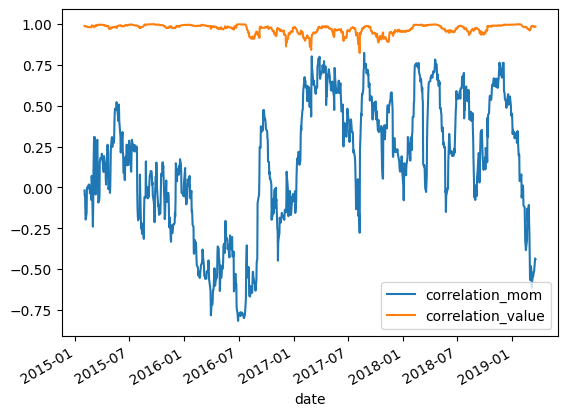

'\nCorrect! As you can see the correlation between momentum and the S&P500 returns fluctuates over time, and at times is highly correlated, and the correlation with value remains high.\n'

In [10]:
# exercise 03

"""
Momentum factor

In this exercise, you are going to investigate the correlation of the S&P500 returns with 2 factors, momentum and value.

A stock is showing "momentum" if its prior 12-month average of returns is positive. The momentum factor is therefore formed by combining stocks that show consistent positive historic returns. The value factor looks at stocks that are inexpensive relative to some measure of fundamental value. For example price-to-earnings and price-to-book are typically ratios to measure "value". Let's see how our S&P500 returns relate to the returns of these factors.

Available is a DataFrame df containing the returns of the two factors and the S&P500 over time.
"""

# Instructions

"""

    Create a new column in df containing the 20-day rolling correlation between the S&P500 returns and the momentum factor, let's call it correlation_mom.
---

    Create another new column in df containing the 20-day rolling correlation between the S&P500 returns and the value factor, let's call it correlation_value.
---

    Plot both rolling correlation coefficients using the function .plot() on the new columns.
---
Question

Which statement is correct when looking at the factor exposures of the S&P500?
Possible answers:
    
    The S&P500 returns are uncorrelated with momentum and highly correlated with value. {Answer}
    
    The S&P500 returns are sometimes highly correlated with momentum and most of the time highly correlated to value.
    
    The S&P500 returns are uncorrelated with momentum and value.
    
    None of the above.
"""

# solution

import matplotlib.pyplot as plt

# Calculate 20-day rolling correlation with momentum 
df['correlation_mom']=df['sp500'].rolling(20).corr(df['momentum'])

# Calculate 20-day rolling correlation with value
df['correlation_value']=df['sp500'].rolling(20).corr(df['value'])

# Plot the correlations
df['correlation_mom'].plot()
df['correlation_value'].plot()
plt.legend()
plt.show()

#----------------------------------#

# Conclusion

"""
Correct! As you can see the correlation between momentum and the S&P500 returns fluctuates over time, and at times is highly correlated, and the correlation with value remains high.
"""

In [12]:
factor_data = pd.read_csv(path_data+'factor_data.csv', parse_dates=['date'], index_col='date')
factor_data.head()

,momentum,value,portfolio
date,,,
2016-01-04,-1.69,-1.53,-1.651745
2016-01-05,0.38,0.10,0.408161
2016-01-06,1.27,-1.22,0.325555
2016-01-07,0.21,-2.38,-0.698259
2016-01-08,-0.20,-0.91,-0.959352


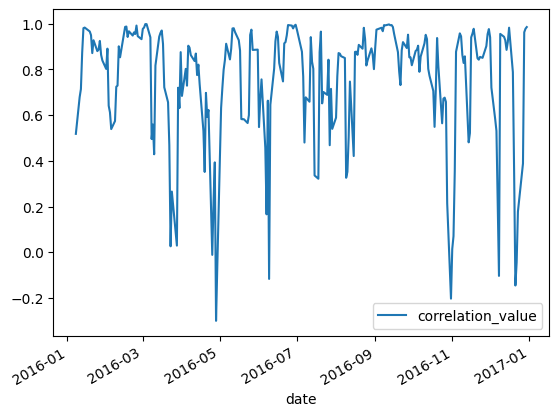

'\nCorrect! There are so many moving parts, and the interaction between your portfolio and the underlying factors changes constantly. It would only be stable if you would completely follow the factor composition.\n'

In [13]:
# exercise 04

"""
Value factor

In the previous exercise you've looked at the S&P500 exposures, and saw that there was a large consistent exposure to the value factor, but a very fluctuating correlation to momentum.

Let's now check how our portfolio measures up to this, and let's especially focus on value. Available to you is a DataFrame called factor_data containing the factor returns as well as your portfolio returns. Start by inspecting the DataFrame factor_data in the IPython shell using factor_data.head().
"""

# Instructions

"""

    Calculate the simple pairwise correlation of the columns in the dataframe factor_data.
---

    Create a new column in factor_data called correlation_value, and assign the rolling correlation between your portfolio and the value factor to it, using a 5 day window. Plot your results.
---
Question

In the correlation graph between your portfolio and the value factor, you see that it fluctuates and dips to a low correlation occasionally. What could be the reason the correlation suddenly dips?
Possible answers:
    
    By changing your portfolio weights based on your investment strategy, the underlying factor exposures also change.
    
    The underlying returns of the stocks that make up the total value factor returns can fluctuate heavily, causing the factor returns to deviate from your portfolios return.
    
    The composition of the value factor changes over time, i.e. the stocks that are deemed high "value" will change over time, and thereby the factor returns can deviate from the portfolio returns.
    
    All of the above. {Answer}
"""

# solution

# Calculate the pairwise correlation
factor_data.corr()

# Calculate rolling 5 day correlation 
factor_data['correlation_value']=factor_data['portfolio'].rolling(5).corr(factor_data['value'])

# Plot the rolling correlation
factor_data['correlation_value'].plot()
plt.legend()
plt.show()

#----------------------------------#

# Conclusion

"""
Correct! There are so many moving parts, and the interaction between your portfolio and the underlying factors changes constantly. It would only be stable if you would completely follow the factor composition.
"""

In [17]:
factor_returns = pd.read_csv(path_data+'factor_returns.csv', parse_dates=['date'], index_col='date')
factor_returns.head()

,Mkt-RF,SMB,HML,RF,pf_returns
date,,,,,
2016-01-04,-1.59,-0.83,0.53,0.0,-1.651745
2016-01-05,0.12,-0.22,0.01,0.0,0.408161
2016-01-06,-1.35,-0.12,0.00,0.0,0.325555
2016-01-07,-2.44,-0.29,0.08,0.0,-0.698259
2016-01-08,-1.11,-0.47,-0.03,0.0,-0.959352


In [18]:
# exercise 05

"""
Fama French factor correlations

In this exercise you want to check how much correlation your portfolio returns have with the Fama French factors. With a quick correlation table, you can very easily gain insight into how your portfolio returns move with for example the excess market return or the size and value factors. Remember, the Fama French factor model was defined as follows:

R_{pf} = \alpha + \beta_m MKT + \beta_s SMB + \beta_h HML

Available is the data containing the factor returns and your portfolio returns under factor_returns. Let's give it a try!
"""

# Instructions

"""

    Obtain the pairwise correlations of your dataset factor_returns and interpret the results.
---
Question

Based on what you see in the correlation table, do you think this portfolio manager has strong strategic investment skills?
Possible answers:
    
    Yes, this portfolio manager has a large alpha because the factors returns and the market returns are not very highly correlated to the portfolio returns.
    
    No, the performance of this portfolio can largely be explained by market returns, but not so much by factor returns. {Answer}
    
    No, the performance of this portfolio can mostly be explained by factor returns.
"""

# solution

# Print the correlation table 
print(factor_returns.corr())

#----------------------------------#

# Conclusion

"""
Correct! The correlation with the market returns is actually quite high, at around 0.74 that's a lot of performance coming from simple market movements. I hope you're not paying high fees for that!
"""

              Mkt-RF       SMB       HML        RF  pf_returns
Mkt-RF      1.000000  0.331250  0.099800  0.087073    0.738586
SMB         0.331250  1.000000 -0.108081  0.076750    0.162303
HML         0.099800 -0.108081  1.000000 -0.049019   -0.237647
RF          0.087073  0.076750 -0.049019  1.000000    0.039383
pf_returns  0.738586  0.162303 -0.237647  0.039383    1.000000


"\nCorrect! The correlation with the market returns is actually quite high, at around 0.74 that's a lot of performance coming from simple market movements. I hope you're not paying high fees for that!\n"

In [20]:
# exercise 06

"""
Linear regression model

In this exercise you're going to use the Fama French model to explain the returns in your portfolio. You'll first walk through the linear regression model taking all the different steps, and obtain the summary at the end to interpret the results.

In this exercise you'll use statsmodels. You might have come across the linear regression model in scikit-learn. If you are curious how the two options compare, you can read more in this blogpost.
(https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9)

Available is a dataset called factor_returns which contains portfolio returns as well as the Fama French factors. Good luck!
"""

# Instructions

"""

    Define and fit the linear regression model. Use the three Fama French factors, i.e. Mkt-RF,SMB, HML to explain the pf_returns.
---

    Create model predictions from the factor returns.
---

    Print out the model summary and inspect it, focus on the coefficients and significance of the three Fama French factors.
---
Question

What can you say about how the Fama French factors explain the portfolio returns? Do they significantly explain the portfolio returns?
Possible answers:
    
    The market excess return is the only one that's significantly correlated to the portfolio returns, as the other factors are negative.
    
    None of the factors, nor the market return can explain the portfolio returns, as the P-values are all zero.
    
    The market excess returns are positively related to the portfolio returns, and the other two factors SMB and HML are negatively related. They all have a significant effect on the portfolio returns. {Answer}
"""

# solution
import statsmodels.api as sm

# Define the model
model = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit()

# Create model predictions
predictions = model.predict(factor_returns[['Mkt-RF','SMB', 'HML']]) 

# Print out the summary
print(model.summary())

#----------------------------------#

# Conclusion

"""
Correct! The low P-values tell you that the effects of the factors on the portfolio return is significant. The sign of the coefficient tells you whether the effect is positive or negative.
"""

                                 OLS Regression Results                                
Dep. Variable:             pf_returns   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              158.8
Date:                Thu, 15 Feb 2024   Prob (F-statistic):                    1.55e-57
Time:                        09:19:12   Log-Likelihood:                         -185.67
No. Observations:                 252   AIC:                                      377.3
Df Residuals:                     249   BIC:                                      387.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

'\nCorrect! The low P-values tell you that the effects of the factors on the portfolio return is significant. The sign of the coefficient tells you whether the effect is positive or negative.\n'

In [21]:
# exercise 07

"""
Fama French Factor model

In this exercise, you are going focus on efficiently obtaining just the beta coefficients of the Fama French model. As you've seen in the video, those betas indicate how much of the portfolio's return changes if that particular factor's return changes.

Sometimes, all you want to do is to check whether the factor relates negatively, or positively to you portfolio returns. You can see this directly from the signs of the coefficients. Available again is the factor_returns data for you. Let's try!
"""

# Instructions

"""

    Import the statsmodels package as sm.
    Fit the linear model to the portfolio returns and Fama French factors, and obtain only the three beta coefficients by extracting the parameters.
    Print the three betas.

"""

# solution

# Import statsmodels
import statsmodels.api as sm

# Obtain the beta coefficients
b1, b2, b3 = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit().params

# Print the betas
print ('Sensitivities of active returns to factors:\nMkt-Rf: %f\nSMB: %f\nHML: %f' %  (b1, b2, b3))

#----------------------------------#

# Conclusion

"""
Great work! Now that you can comfortably run the Fama French factor model on portfolio returns, you may almost call yourself a professional! Regressions are widely used in portfolio analysis to help understand how return series are related to each other. In the next lesson, you'll learn about tools that are publicly available that can make more complicated portfolio analysis much easier to perform.
"""

Sensitivities of active returns to factors:
Mkt-Rf: 0.823443
SMB: -0.227198
HML: -0.482598


"\nGreat work! Now that you can comfortably run the Fama French factor model on portfolio returns, you may almost call yourself a professional! Regressions are widely used in portfolio analysis to help understand how return series are related to each other. In the next lesson, you'll learn about tools that are publicly available that can make more complicated portfolio analysis much easier to perform.\n"

In [9]:
# exercise 08

"""
Performance tear sheet

In this exercise, you're going to create a full performance tear sheet on the S&P500 returns. You'll see that the elaborate calculations you've done in previous chapters, can very quickly be generated with this simple tear sheet, and by inputting just the returns data. In that sense, this tear sheet can save you a lot of time!

In the first few steps, you'll have to make sure that the data is in the right format otherwise, Pyfolio will give an error. The returns data is available as returns_sp500. Go ahead and inspect the returns_sp500 data in the IPython shell using returns_sp500.head().
"""

# Instructions

"""

    Convert the returns data index to a datetime index.
---

    returns_sp500 is currently a Pandas DataFrame. Transform it into a Pandas Series by taking only the S&P500 column and assigning that to a new series called returns. Check the type of the new object.
---

    Create the tear sheet on the returns data. You can open the full tear sheet in the HTML viewer window by clicking the arrows on the HTML viewer tab.

"""

# solution

# Set the index to datetime
returns_sp500.index=pd.to_datetime(returns_sp500.index)

# Ensure the returns are a series
returns=returns_sp500['S&P500']

# Create the returns tear sheet
fig = pf.create_returns_tear_sheet(returns, return_fig=True)

# Display a zoomed in version of the tear sheet
display_tear_sheet()

#----------------------------------#

# Conclusion

"""
Great work! By scrolling through the performance tear sheet you see that you can obtain all kinds of risk and return calculations. Many of the things we have covererd throughout this course are now calcuated in just a few lines of code. Pyfolio can thus save you a lot of time! You can find the cumulative returns, rolling volatility, the Sharpe ratio, the Sortino ratio, the return distribution, skewness, kurtosis, as well as draw-downs on the tear sheet. Make sure to take a moment to locate all these items, and familiarize yourself with the pyfolio returns tear sheet.
"""

'\n\n'

In [10]:
# exercise 09

"""
Industry exposures with Pyfolio

You saw in the first video of this chapter how to use a groupby function to create the active weights per industry. The drawback is that it takes a snapshot in time. Since portfolio weights change, you can imagine that the industry exposures change over time as well. However, the calculation to determine industry exposures on each day for your portfolio, can become quite tedious and complex.

Luckily, you can use Pyfolio's tear sheet for this. The tear sheet shows you exposures over time, and summarizes overall top stock picks in your portfolio. Available is data on your portfolio returns under returns, and your daily positions in dollar value per stock, under positions. Go ahead and inspect positions and returns in the console.
"""

# Instructions

"""

    Inspect positions and returns in the console. Then, assign the Technology sector to the DELL stock in your sector mapping. Notice that the sector mapping assigns an industry to each stock in your portfolio.
---

    Create the position tear sheet by inputting first returns and then positions into the function.You can open the position tear sheet in the HTML viewer window by clicking the arrows on the HTML viewer tab.
---
Question

Inspecting the tear sheet, what is your top stock pick overall, and to which industry do you have the biggest overweight position over time?
Possible answers:
    
    The top holding is COST, and the biggest sector exposure is Technology. {Answer}
    
    The top holding is AMD, and the biggest sector exposure is Technology
    
    The top holding is COST, and the biggest sector exposure is Construction.
    
    The top holding is ADM, and the biggest sector exposure is Construction.
"""

# solution

# Define sector mappings
sect_map = {'COST': 'Consumer Goods',
            'INTC': 'Technology', 
            'CERN': 'Healthcare', 
            'GPS': 'Technology',
            'MMM': 'Construction', 
            'DELL': 'Technology', 
            'AMD': 'Technology'}

# Create sector exposure tear sheet
pf.create_position_tear_sheet(returns, positions, sector_mappings=sect_map)
display_tear_sheet()

#----------------------------------#

# Conclusion

"""
Correct! Indeed COST is the top position over time, and the biggest exposure is to the Technology sector.
"""

'\n\n'